In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import math
import pylab as pl


def E_comp(s_mod,s_obs,theta):
    
    return np.sqrt( (s_mod)**2 + s_obs**2 -2* s_mod *s_obs* np.cos(theta))

In [15]:
# First Model

dt = 200  #time step
t= np.arange(0,5*24*3600,dt)        #time length
N=len(t)
A=1e-3
phi=0  #phase
omega = 2*np.pi/(24*3600)       #angular velocity of earth
lat = 52.457
f = 2*omega*np.sin(lat)
rho = 1.225 #kg/m3
alpha = 6371*1000 #radius of earth
v=np.zeros(N)       #empty array for v velocity values
u=np.zeros(N)       #empty array for u velocity values
u[0] = 0            #initial value (boundary condition)
v[0] = 0             #initial value (boundary condition)
t[0] = 0             #initial value (boundary condition)

def du_dt(v,t):
    return f*v-A*np.cos(omega*t+phi)/rho

#uderiv(2, 3) = -0.012013374020907365
    
def dv_dt(u):
    return -f*u

for n in range(N-1):
    u[n+1] = u[n] + dt* du_dt(v[n],t[n])
    v[n+1] = v[n] + dt * dv_dt(u[n])

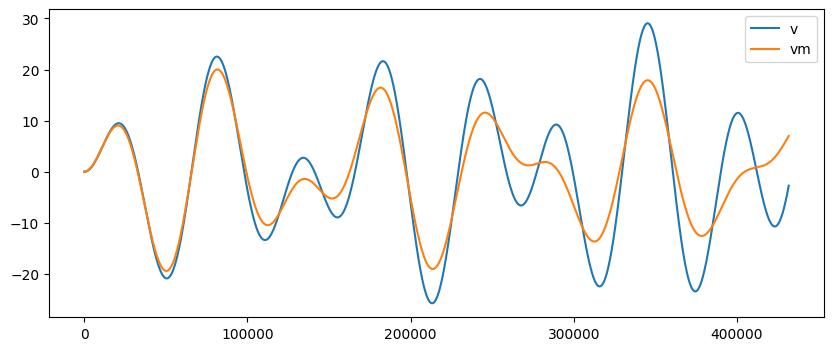

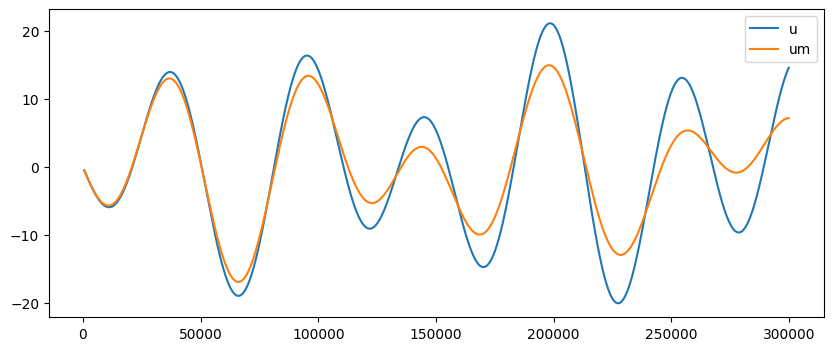

In [16]:

#%%Matsuno

vm=np.zeros(N)       #empty array for v velocity values
um=np.zeros(N)       #empty array for u velocity values
um[0] = 0            #initial value (boundary condition)
vm[0] = 0             #initial value (boundary condition)
#[0] = 0             #initial value (boundary condition)
    
def du_dt(v,t):
    return f*v-A*np.cos(omega*t+phi)/rho
    
def dv_dt(u):
    return -f*u

#Predictor step
for n in range(N-1):
    k = um[n] + dt* du_dt(vm[n],t[n])
    l = vm[n] + dt * dv_dt(um[n])
    um[n+1] = um[n] + dt* du_dt(l,t[n+1])
    vm[n+1] = vm[n] + dt * dv_dt(k)
    

plt.figure()
plt.plot(t,v,label='v')
plt.plot(t,vm,label='vm')
plt.legend()


plt.figure()
plt.plot(t[3:1500],u[3:1500],label='u')
plt.plot(t[3:1500],um[3:1500],label='um')
plt.legend()

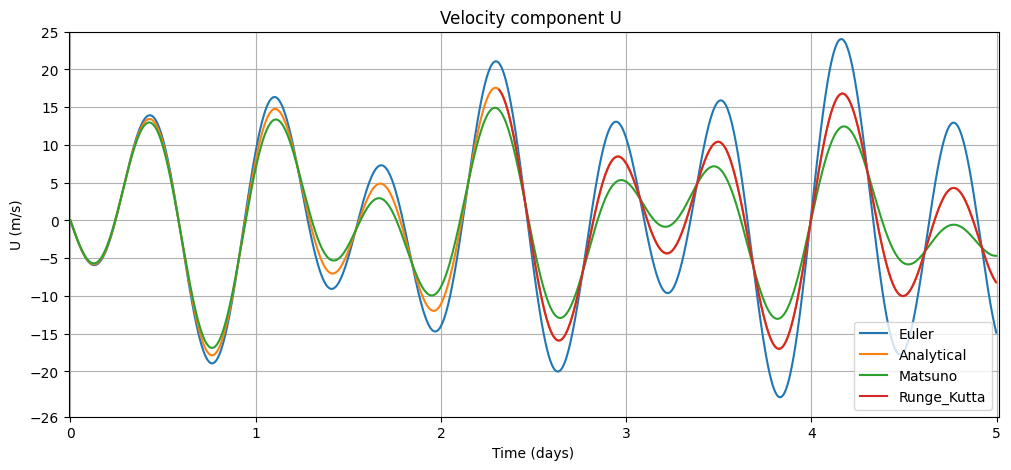

In [17]:
#Analytical Solution
    
u_a = A*(omega*np.sin(omega*t)-f*np.sin(f*t))/ (rho*(f**2-omega**2))

v_a = f*A*(np.cos(omega*t)-np.cos(f*t))/ (rho*(f**2-omega**2))
    
    
    
#%%Runge Kutta
def f_r(t,u,v):
    return f*v - A*np.cos(omega*t+phi) / rho

def g_r(t,u,v):
    return -f*u

u_r = np.zeros(N)
v_r = np.zeros(N)

for n in range(N-1):
    
    k1=dt*f_r(t[n],u_r[n],v_r[n])
    l1=dt*g_r(t[n],u_r[n],v_r[n])
    k2=dt*f_r(t[n]+dt/2,u_r[n]+k1/2,v_r[n]+l1/2)
    l2=dt*g_r(t[n]+dt/2,u_r[n]+k1/2,v_r[n]+l1/2)
    k3=dt*f_r(t[n]+dt/2,u_r[n]+k2/2,v_r[n]+l2/2)
    l3=dt*g_r(t[n]+dt/2,u_r[n]+k2/2,v_r[n]+l2/2)
    k4=dt*f_r(t[n]+dt,u_r[n]+k3,v_r[n]+l3)
    l4=dt*g_r(t[n]+dt,u_r[n]+k3,v_r[n]+l3)
    
    u_r[n+1]=u_r[n]+1/6 *(k1+2*k2+2*k3+k4)
    v_r[n+1]=v_r[n]+1/6 *(l1+2*l2+2*l3+l4)
    

#%% Plotting simulation and analytical solution

plt.figure(figsize=(12,5))
#plt.suptitle('Numerical and Analytical Solution', fontsize=16)
#plt.subplot(2,1,1)
plt.plot(t/(24*3600),u, label = 'Euler')
plt.plot(t/(24*3600),u_a, label='Analytical')
plt.plot(t/(24*3600),um, label='Matsuno')
plt.plot((t/(24*3600))[1000:2159],u_r[1000:2159], label='Runge_Kutta')
plt.legend()
plt.xlabel('Time (days)')
plt.xticks(np.arange(0, 6))
plt.ylabel('U (m/s)')
plt.ylim([-25,25])
plt.xlim([-0.01,5.01])
plt.yticks([-26,-20,-15,-10,-5,0,5,10,15,20,25])
plt.grid()
plt.title('Velocity component U ')
plt.savefig('Numerical and Analytical and Matsuno Solution, u',bbox_inches="tight")

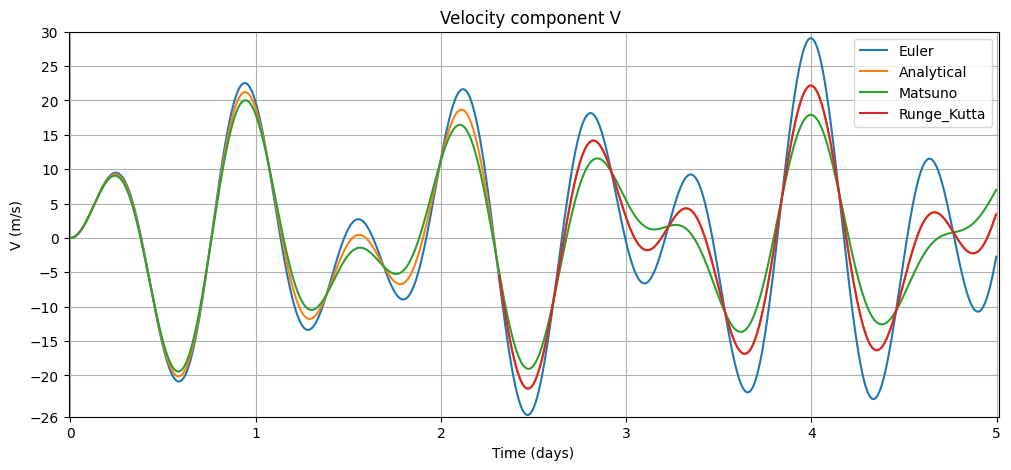

In [18]:
plt.figure(figsize=(12,5))
#plt.subplot(2,1,2)
plt.plot(t/(24*3600),v,label = 'Euler')
plt.plot(t/(24*3600),v_a, label = 'Analytical')
plt.plot(t/(24*3600),vm, label = 'Matsuno')
plt.plot((t/(24*3600))[1000:2159],v_r[1000:2159], label='Runge_Kutta')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('V (m/s)')
plt.xticks(np.arange(0, 6))
#plt.subplots_adjust(wspace=0.4)
#plt.legend(bbox_to_anchor=(1, 0.5))
plt.grid()
plt.ylim([-26,30])
plt.xlim([-0.01,5.01])
plt.yticks([-26,-20,-15,-10,-5,0,5,10,15,20,25,30])
plt.title('Velocity component V ')
plt.savefig('Numerical and Analytical and Matsuno Solution, v',bbox_inches="tight")


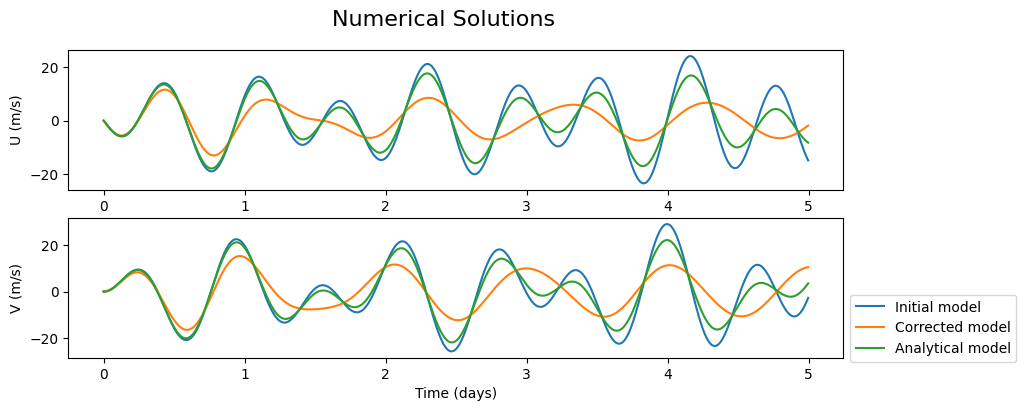

In [19]:
#%%  Improved model


lamda = 1e-5
v2=np.zeros(N)       #empty array for v velocity values
u2=np.zeros(N)       #empty array for u velocity values
u2[0] = 0            #initial value (boundary condition)
v2[0] = 0             #initial value (boundary condition)
    
def du__dt(u2,v2,t):
    return f*(v2-(A*np.cos(omega*t+phi)/(f*rho))) + (u2*v2*np.tan(lat))/alpha - lamda*u2

def dv__dt(u2,v2):
    return -f*u2 - (u2**2 * np.tan(lat))/alpha - lamda*v2


for n in range(N-1):
    u2[n+1] = u2[n] + dt * du__dt(u2[n],v2[n],t[n])
    v2[n+1] = v2[n] + dt * dv__dt(u2[n],v2[n])



#%% Plot of the initial and improved model
plt.figure()
plt.suptitle('Numerical Solutions', fontsize=16)
plt.subplot(2,1,1)
plt.plot(t/(24*3600),u)
plt.plot(t/(24*3600),u2)
plt.plot(t/(24*3600),u_a)
plt.xlabel('Time (days)')
plt.xticks(np.arange(0, 6))
plt.ylabel('U (m/s)')
plt.subplot(2,1,2)
plt.plot(t/(24*3600),v,label = 'Initial model')
plt.plot(t/(24*3600),v2, label = 'Corrected model')
plt.plot(t/(24*3600),v_a, label = 'Analytical model')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('V (m/s)')
plt.xticks(np.arange(0, 6))
plt.subplots_adjust(wspace=0.4)
plt.legend(bbox_to_anchor=(1, 0.5))
plt.savefig('Numerical and Analytical Solution',bbox_inches="tight")


In [24]:
#%% Best fit of observations
data = np.genfromtxt("./Book1.txt", skip_header=1, filling_values=np.nan, delimiter="\t")

In [25]:
av_press1 = (data[:,7])*1e-3
av_press = av_press1[~ np.isnan(av_press1)]
time = data[:,0][~ np.isnan(av_press1)]
def func(time,a,phii):
    return a * np.cos(omega*3600*time+phii) 
popt, pcov = curve_fit(func, time, av_press,bounds=([0,0],[np.inf,2*np.pi]))
#time : The independent variable where the data is measured
#av_press: The dependent data
#curve fit is looking for coefficients for my data(av_press)

In [28]:
new_amp = popt[0]
new_phase = popt[1]

u_obs = data[:,5]
v_obs = data[:,6]
time_obs = np.arange(0,48,1)

#%%  Improved model

lamda = np.logspace(-6,-2,12)
std_u_mod = np.zeros(12)
std_v_mod = np.zeros(12)
std_u_obs = np.zeros(12)
std_v_obs = np.zeros(12)
corr_u= np.zeros(12)
corr_v = np.zeros(12)

std_u_obs = np.std(u_obs)
std_v_obs = np.std(v_obs)

for i in range(12): 
    v3=np.zeros(N)       #empty array for v velocity values
    u3=np.zeros(N)       #empty array for u velocity values
    u3[0] = 0            #initial value (boundary condition)
    v3[0] = 0             #initial value (boundary condition)
           
    def du__dt(u3,v3,t):
        return f*(v3-(new_amp*np.cos(omega*t+new_phase)/(f*rho))) + (u3*v3*np.tan(lat))/alpha - lamda[i]*u3
    
    def dv__dt(u3,v3):
        return -f*u3 - (u3**2 * np.tan(lat))/alpha - lamda[i]*v3
       
    for n in range(N-1):
        u3[n+1] = u3[n] + dt * du__dt(u3[n],v3[n],t[n])
        v3[n+1] = v3[n] + dt * dv__dt(u3[n],v3[n])
    
    #interpolate between the values of the model, to get 48values to compare them with the observations
    u_int = np.interp(np.arange(48)*3600, t, u3)
    v_int = np.interp(np.arange(48)*3600, t, v3)
    
    std_u_mod[i] = np.std(u_int)
    std_v_mod[i] = np.std(v_int)    
    corr_u[i] = np.corrcoef(u_obs,u_int)[1,0]
    corr_v[i] = np.corrcoef(v_obs,v_int)[1,0]

lamda_list = lamda
np.savetxt('lamda_list.txt', lamda_list, fmt='%1.4e')

plt.figure()


<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

<Figure size 1000x400 with 0 Axes>

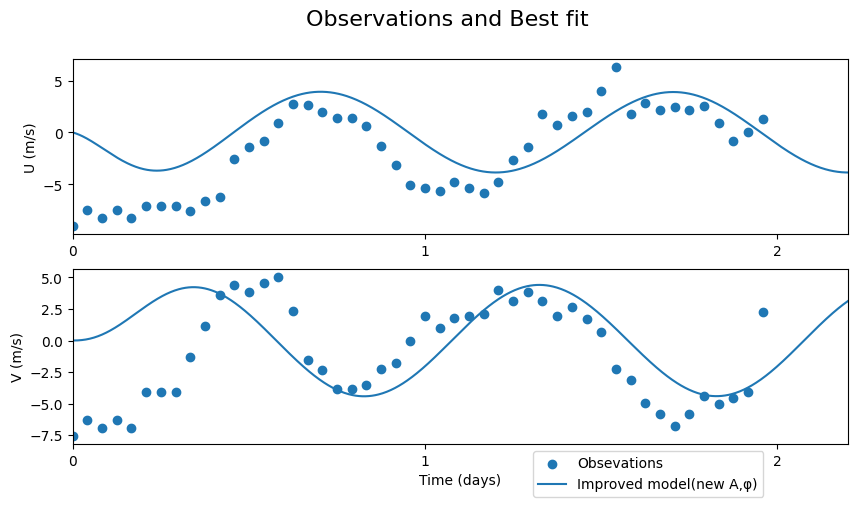

In [29]:
#%%  Improved model from best fit, with the best lamda from next questions -->Taylor diagramm


lamda_u = 7.5e-5

std_u_obs = np.std(u_obs)
std_v_obs = np.std(v_obs)

v4=np.zeros(N)       #empty array for v velocity values
u4=np.zeros(N)       #empty array for u velocity values
u4[0] = 0            #initial value (boundary condition)
v4[0] = 0             #initial value (boundary condition)
       
def du__dt(u4,v4,t):
    return f*(v4-(new_amp*np.cos(omega*t+new_phase)/(f*rho))) + (u4*v4*np.tan(lat))/alpha - lamda_u*u4

def dv__dt(u4,v4):
    return -f*u4 - (u4**2 * np.tan(lat))/alpha - lamda_u*v4
   
for n in range(N-1):
    u4[n+1] = u4[n] + dt * du__dt(u4[n],v4[n],t[n])
    v4[n+1] = v4[n] + dt * dv__dt(u4[n],v4[n])
        
        
plt.savefig('bestfit+bestlamda')
    
#%% Plot improved model with old and new amplitude and phase
plt.figure(figsize=(10,5))
plt.suptitle('Observations and Best fit', fontsize=16)
plt.subplot(2,1,1)
plt.scatter(time_obs/24,u_obs)
plt.plot(t/(24*3600),u4)

plt.xlim(0,2.2)
plt.xticks([0,1,2])
plt.ylabel('U (m/s)')
plt.subplot(2,1,2)
plt.scatter(time_obs/24,v_obs,label = 'Obsevations')
plt.plot(t/(24*3600),v4, label = 'Improved model(new A,φ)')
plt.legend()
plt.xlabel('Time (days)')
plt.ylabel('V (m/s)')
plt.xlim(0,2.2)
plt.xticks([0,1,2])
plt.subplots_adjust(wspace=0.4)
plt.legend(bbox_to_anchor=(0.9, 0.001))
plt.savefig('Best_fit_best_lamda',bbox_inches="tight")


ValueError: 'bottom right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

<Figure size 1200x1700 with 0 Axes>

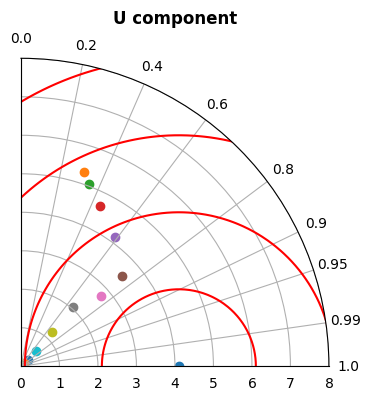

In [30]:
#%% Taylor diagram

plt.figure(figsize=(12,17))
corr_labels = np.array([0, 0.2, 0.4, 0.6, 0.8, 0.9, 0.95, 0.99, 1.])
corr_labels = np.append(-corr_labels, corr_labels)
corr_labels = np.unique(corr_labels)

#create the grid in which i will draw lines of equal E
R_grid = np.arange(0,9,1e-1)
theta_grid = np.linspace(0,np.pi,180)
R_mesh, theta_mesh = np.meshgrid(R_grid,theta_grid)

Eu = E_comp(R_mesh, std_u_obs, theta_mesh)
Ev = E_comp(R_mesh, std_v_obs, theta_mesh)

#%%
#plot for u
plt.figure()
ax1 = plt.subplot(111,projection='polar')
ax1.scatter(0, std_u_obs,label="observations")
for i in range(12):
    ax1.scatter(np.arccos(corr_u)[i],std_u_mod[i],label="lamda={:0.2e}".format(lamda_list[i]))
ax1.set_title("U component",fontweight="bold")
ax1.set_thetagrids(np.rad2deg(np.arccos(corr_labels)), corr_labels)  #put numbers(of corr coeff) instead of angles in the curve around the half circle
ax1.set_thetalim(0,np.pi/2)
ax1.set_rlim([0,8])
C=ax1.contour(theta_mesh,R_mesh,Eu,colors='red',levels=[2,4,6,8,10])
plt.legend(loc='bottom right', bbox_to_anchor=(1.8,0.9))
ax1.clabel(C)
plt.text(1,9,'Correlation Coefficient')
plt.xlabel('Standard Deviation',labelpad=20)
plt.savefig('Taylordiagram_u',bbox_inches="tight")  


ValueError: 'bottom right' is not a valid value for loc; supported values are 'best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center'

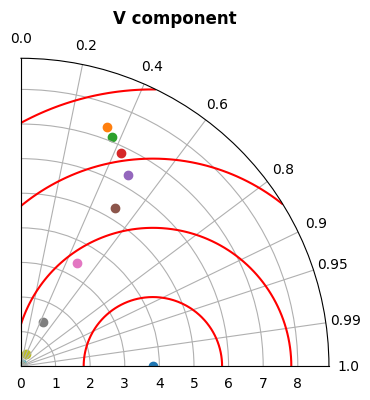

In [31]:
#%%
#plot for v
plt.figure()
ax = plt.subplot(111, projection='polar')
ax.scatter(0, std_v_obs,label="observations")
for i in range(12):
    ax.scatter(np.arccos(corr_v)[i],std_v_mod[i],label="lamda={:0.2e}".format(lamda_list[i]))  
ax.set_title("V component",fontweight="bold")
ax.set_thetagrids(np.rad2deg(np.arccos(corr_labels)), corr_labels)
ax.set_thetalim(0,np.pi/2)
plt.subplots_adjust(wspace=0.4)
C=ax.contour(theta_mesh,R_mesh,Ev,colors='red',levels=[2,4,6,8,10]) 
plt.legend(loc='bottom right', bbox_to_anchor=(1.8,0.9))
ax.clabel(C)
plt.xlabel('Standard Deviation',labelpad=20)
plt.text(1,9,'Correlation Coefficient')